# Simple Random Graph Model (1959)

## Binomial Random Graph Model

Model $\mathcal{G}(n,p)$ has two parameters:
- $n$ is the number of nodes,
- $p$ is the probability to have a tie.

This was one of the first models to appear in the literature.

### Assumptions of the model

1. Ties between nodes are independents from each others,
2. The probability to form a tie is the same for every nodes

> This is the i.i.d. assumption

The distribution of the adjacency matrix, under the Binomial random graph is a *Bernoulli* with success probability $p$.

## Simulating from the Binomial random graph

We can have two cases:

- Directed 
- Undirected

### Directed

1. Simulate $n^2$ values from a Bernoulli with probability $p$
2. Transform the vector in a $n \times n$ matrix
3. Set the diagonal to 0.

### Undirected

1. Simulate $n(n-1)/2$ values from a Bernoulli with probability $p$
2. Transform the vector in a triangular matrix
3. Set the diagonal to $0$
4. Symmetrize the matrix with $Y = Y + Y^T$



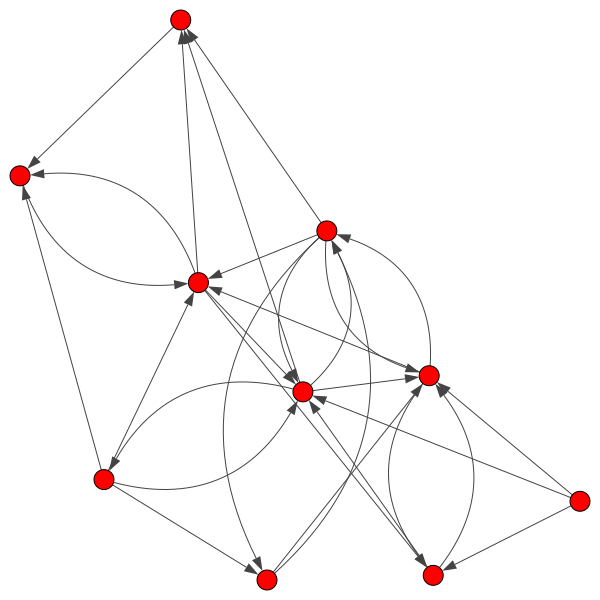

In [1]:
import numpy as np
import igraph as ig

rng = np.random.default_rng()
n = 10
p = 0.3
# Set a seed for reproducibility
np.random.seed(42)
# 1 Simulate from Bernoulli
directed = rng.binomial(1, p, n**2)
# 2 Transform the vector in a matrix
directed = np.reshape(directed, (n,n))

# 3 Set diagonal to 0
np.fill_diagonal(directed,0)

# Construct and plot the graph
directed_graph = ig.Graph.Adjacency((directed > 0).tolist(), mode=ig.ADJ_DIRECTED)
ig.plot(directed_graph)

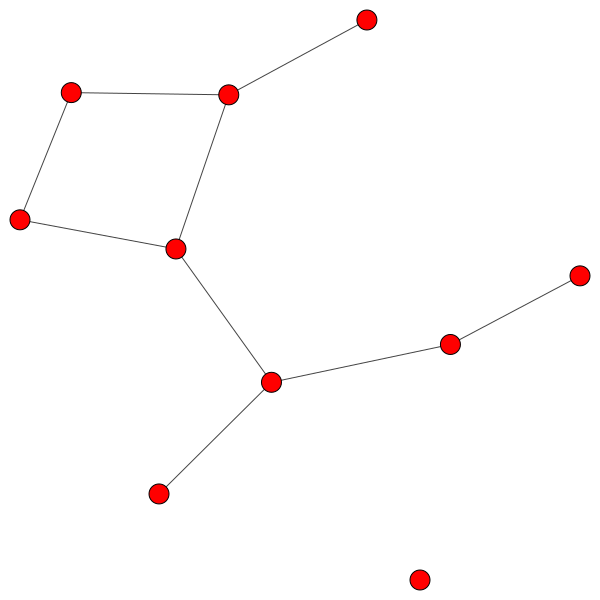

In [2]:
# 1 Simulate from Bernoulli
undirected = rng.binomial(1, p, n**2)

# 2 Transform the vector in a triangular matrix
undirected = np.reshape(undirected, (n,n))
undirected = np.triu(undirected, 1)
undirected = undirected + undirected.T
# 3 Set diagonal to 0
np.fill_diagonal(undirected,0)

# Construct and plot the graph
undirected = ig.Graph.Adjacency((undirected > 0).tolist(), mode=ig.ADJ_UNDIRECTED)
ig.plot(undirected)

## Assessing significance with a specific model

Given $\mathcal{G}(n,p_0)$ we want to check is our data are coherence with the model.

We compare the property of the observed network with the ones we would have observed under the null model.

For approximating the null model we can use a Monte Carlo approach:

1. Simulate B replicates of the network under the **null model** $$\tilde{Y}^{(b)} \sim \mathcal{G}(n,p_0)$$
2. Compute a desired statistic on each replica
3. The distribution of the statistic provides us the null distribution

We can now plot the distribution and $p_0$ to make a visual check or we can compute the p-value with the Monte Carlo approach. 

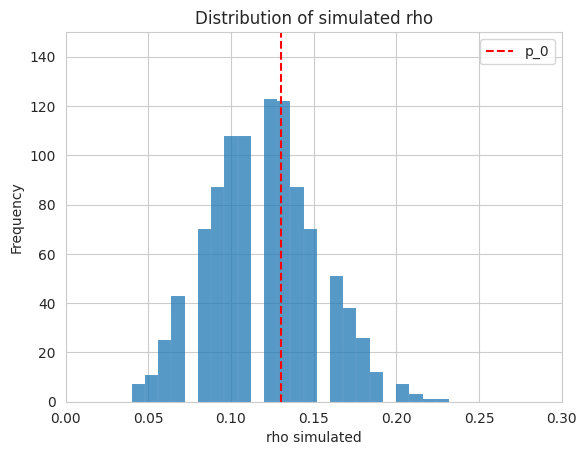

In [3]:
# Given the example above, (i.e.) n = 10 and p = 0.3, let's check if p_0 = 0.13 is coherence
# It is just an example of simulation

import seaborn as sns
import matplotlib.pyplot as plt
# Get the number of rows of the graph
n = np.shape(directed)[0]
p_0 = 0.13

B = 1000
simulated = np.array(n)
for b in range(B):
    #generate an observation
    temp = rng.binomial(1, p_0, n**2)
    temp = np.reshape(temp, (n,n))
    np.fill_diagonal(temp,0)
    simulated = np.append(simulated, temp.mean())
    
sns.histplot(data=simulated)

plt.axvline(x=p_0, color='red', linestyle='--', label='p_0')

plt.xlabel('rho simulated')
plt.ylabel('Frequency')
plt.title('Distribution of simulated rho')

plt.ylim(0, 150)
plt.xlim(0,0.3)
plt.legend()
plt.show()



For the p-value we can check extreme values

In [4]:
print(np.mean(simulated >= p_0))

0.41858141858141856


Both checks shows that under $H_0$ values of the density statistic as high as the observed one, are not so unlikely so we can **not** reject $H_0$.